# Week 6 Module 2 Assignment 3
## Francis Yang 11/11/2022

### Exercise 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

2) Repeat Step 1 using pipelines and report the score.

3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
scaler = MinMaxScaler()
knn = KNeighborsClassifier()

sX_train = scaler.fit_transform(X_train,y_train)
sX_test = scaler.fit_transform(X_test,y_test)

knn.fit(sX_train, y_train)
knn.score(sX_test, y_test)

0.965034965034965

In [4]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler',MinMaxScaler()),('knn',KNeighborsClassifier())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.951048951048951

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'knn__n_neighbors':np.arange(1,11,2)}
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.951048951048951

### Exercise 2
Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

*    Use `from sklearn.neighbors import KNeighborsRegressor'
*    You need to split the data into X and y.
*    Check the data shape
*    Check the data types
*    Print the column names of the data frame
*    Create a scatterplot of each feature against the target variable (you may use clues our previous labs to do that)
*    Create alist of features that are numeric and not numeric
*    Create a pipeline of imputer and standard scaler for the numeric features
*    Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
*    You can create your column transformer in different ways
*    Finally create a pipeline of column transformer and kNeighborsRegressor
*    Split your data into train and test datasets
*    Report the score on the test dataset

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
from sklearn.compose import ColumnTransformer
data = pd.read_csv('datasets/bike_day_raw.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [9]:
data.shape

(731, 11)

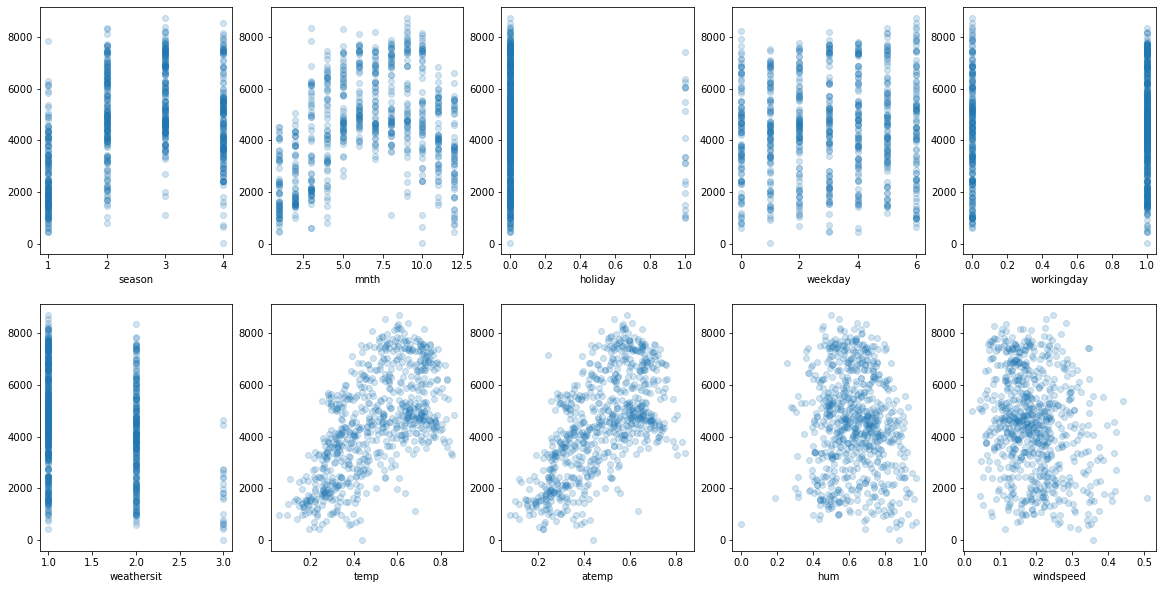

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

y = data.cnt #scale on order of 10^3
for i, ax in enumerate(axes.ravel()):
    X = data.iloc[:, i]
    ax.scatter(X, y, alpha=0.2)
    ax.set_xlabel(data.columns[i])

All features have numerical representation. The first 6 features are categorical and the last 4 are continuous.

In [16]:
data.isnull().value_counts() #skip imputer

season  mnth   holiday  weekday  workingday  weathersit  temp   atemp  hum    windspeed  cnt  
False   False  False    False    False       False       False  False  False  False      False    731
dtype: int64

In [ ]:
pipe2 = Pipeline([('scaler',scale()),('coltransform',ColumnTransformer(),)])